In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
vgg_model = Sequential()
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(256,256,3))
base_model.trainable = False
vgg_model.add(base_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(3, activation='softmax'))

vgg_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Summary of the model
vgg_model.summary()

# Data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.5, 1.3],
    fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training, validation, and test datasets
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/potato_leaf_disease_classification/Train', target_size=(256, 256), batch_size=16, class_mode='categorical',color_mode="rgb")
validation_set = val_datagen.flow_from_directory('/content/drive/MyDrive/potato_leaf_disease_classification/Validation', target_size=(256, 256), batch_size=16, class_mode='categorical',color_mode="rgb")
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/potato_leaf_disease_classification/Test', target_size=(256, 256), batch_size=16, class_mode='categorical',color_mode="rgb")

# Train the model
history = vgg_model.fit(training_set, steps_per_epoch=20, epochs=50, validation_data=validation_set, validation_steps=20)

# Evaluate the model
test_loss, test_acc = vgg_model.evaluate(test_set, verbose=2)
print("\n\n")
print("Test Loss: \t", test_loss, "\n")
print("Test Accuracy: \t", test_acc, "\n")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               16777728  
                                                                 
 dense_3 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 31493955 (120.14 MB)
Trainable params: 16779267 (64.01 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Found 1296 images belonging to 3 classes.
Found 430 images belonging to 3 classes.
Found 430 images belonging to 3 classes.
Epoch 1/50
20

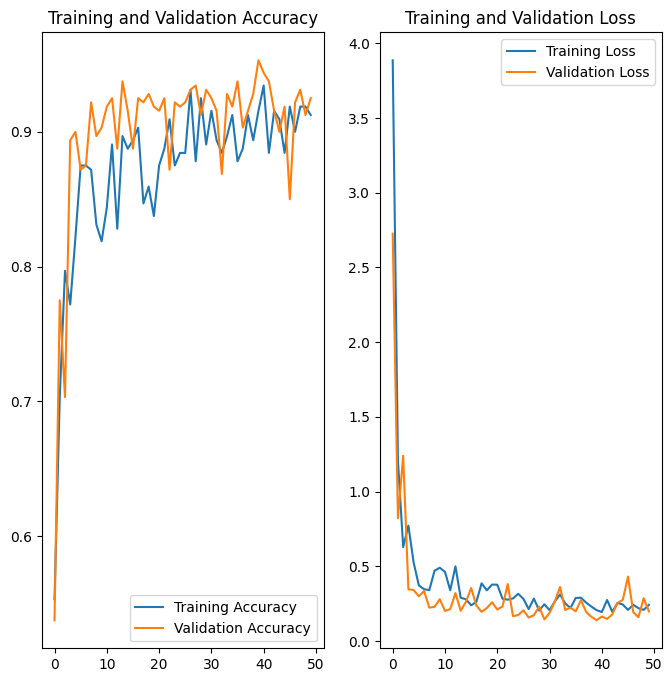

In [ ]:
from matplotlib import pyplot as plt
EPOCHS = 50
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
vgg_model.save('final_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image

# Load and preprocess the test image
test_image = image.load_img('/content/drive/MyDrive/Potato_Healthy.jpg', target_size=(256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Predict the class of the test image
result = vgg_model.predict(test_image)
print(result)

# Assuming the class indices mapping
# training_set.class_indices will return a dictionary like {'class1': 0, 'class2': 1, 'class3': 2}
class_indices = training_set.class_indices
class_labels = {v: k for k, v in class_indices.items()}  # Reverse the dictionary to get labels from indices

# Get the predicted class index
predicted_class_index = np.argmax(result, axis=1)[0]
prediction = class_labels[predicted_class_index]

print(prediction)

1/1 [==============================] - 1s 1s/step
[[0. 0. 1.]]
Potato___healthy


In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image

# Load and preprocess the test image
test_image = image.load_img('/content/drive/MyDrive/test_potato_early_blight.jpg', target_size=(256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Predict the class of the test image
result = vgg_model.predict(test_image)
print(result)

# Assuming the class indices mapping
# training_set.class_indices will return a dictionary like {'class1': 0, 'class2': 1, 'class3': 2}
class_indices = training_set.class_indices
class_labels = {v: k for k, v in class_indices.items()}  # Reverse the dictionary to get labels from indices

# Get the predicted class index
predicted_class_index = np.argmax(result, axis=1)[0]
prediction = class_labels[predicted_class_index]

print(prediction)

1/1 [==============================] - 0s 26ms/step
[[1. 0. 0.]]
Potato___Early_blight
